# Sales Analysis

#### loading the libraries

In [141]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt

## ----- Task 1 -----

### Merging 12 months of data into a single file

####  My Way :

In [15]:
## ----- My WAy -----

data_sets = [pd.read_csv("../SalesAnalysis/Sales_Data/Sales_" + month + "_2019.csv") 
            for month in ["January", "February", "March", "April", "May", "June", 
            "July","August", "September", "October", "November", "December"] ]

# len(data_sets)

# type(data_sets[0])


Big_Data =  pd.concat(data_sets)

Big_Data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


#### Keith's way:

In [31]:
#df = pd.read_csv("../SalesAnalysis/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("../SalesAnalysis/Sales_Data/")]

#print(files[0])

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("../SalesAnalysis/Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])
    
#all_months_data.head()

all_months_data.to_csv("all_data.csv", index=False)

### Reading the updated dataframe

In [96]:
all_data =pd.read_csv("./all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Augument data with additional columns

## ----- TASK 2 -----
#### Add the month column

In [100]:
## MY WAY :-

#type(all_data["Order Date"])
#all_data["Order Date"]
#datetime.now()
#pd.to_datetime(all_data["Order Date"], errors="coerce")

all_data["Order Date"] = pd.to_datetime(all_data["Order Date"], errors="coerce")

all_data["Month"] = all_data["Order Date"].dt.month

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0


In [75]:
# removed month column 

all_data = all_data.drop("Month", axis=1)

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


### clean up the data

In [99]:
## Keith's Way :

# drop all nan rows

nan_df = all_data[all_data.isna().any(axis=1)]

nan_df.head()


#all_data = all_data.dropna(how="any")
#all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [82]:
# convert to month

dates = pd.Series(all_data["Order Date"])
dates.apply(lambda x: x.strftime('%Y-%m-%d'))


0        2019-04-19 08:46:00
2        2019-04-07 22:30:00
3        2019-04-12 14:38:00
4        2019-04-12 14:38:00
5        2019-04-30 09:27:00
                 ...        
186845   2019-09-17 20:56:00
186846   2019-09-01 16:00:00
186847   2019-09-23 07:39:00
186848   2019-09-19 17:30:00
186849   2019-09-30 00:18:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

In [91]:
all_data["Month"] = str(dates)

all_data.head()

## keiths way was not working and I got back to mine

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",0 2019-04-19 08:46:00\n2 2019-04...
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",0 2019-04-19 08:46:00\n2 2019-04...
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",0 2019-04-19 08:46:00\n2 2019-04...
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",0 2019-04-19 08:46:00\n2 2019-04...
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",0 2019-04-19 08:46:00\n2 2019-04...


In [123]:
#type(all_data["Quantity Ordered"][0])

type(all_data["Price Each"][0])

str

In [124]:
#all_data["Sales"] = pd.to_numeric(all_data["Quantity Ordered"]) * pd.to_numeric(all_data["Price Each"])

#all_data.head()

#all_data.iloc[[517, 518]]

# check duplicates or same values or nan values

tmp_data = all_data[all_data["Quantity Ordered"] == "Quantity Ordered"]

tmp_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
1155,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
2878,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
2893,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
185551,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
186563,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
186632,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN


### convert columns to required types

In [130]:
# checked twice
all_data[all_data["Quantity Ordered"] == "Quantity Ordered" ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [129]:
all_data = all_data[all_data["Quantity Ordered"] != "Quantity Ordered" ]

In [133]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])

all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])


<ipython-input-133-2dfd47bb56e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
<ipython-input-133-2dfd47bb56e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])


## ----- TASK 3 -----
### Add a sales column

In [135]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

all_data.head()

<ipython-input-135-50bda662b87b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99


#### Question no.1 :  What was the best month for sales? How much was earned that month?

In [143]:
results = all_data.groupby("Month").sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1.0,10903,1.811768e+06,1.822257e+06
2.0,13449,2.188885e+06,2.202022e+06
3.0,17005,2.791208e+06,2.807100e+06
4.0,20558,3.367671e+06,3.390670e+06
5.0,18667,3.135125e+06,3.152607e+06
6.0,15253,2.562026e+06,2.577802e+06
7.0,16072,2.632540e+06,2.647776e+06
8.0,13448,2.230345e+06,2.244468e+06
9.0,13109,2.084992e+06,2.097560e+06


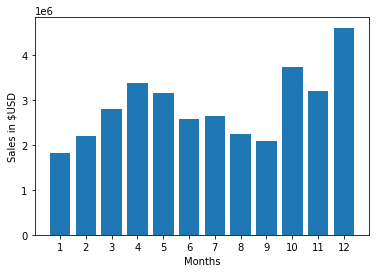

In [148]:
months = range(1, 13)

plt.bar(months, results["Sales"])

plt.xticks(months)

plt.xlabel("Months")
plt.ylabel("Sales in $USD")

plt.show()

### --- TASK 4 ---

In [184]:
## MY WAY

# augument data with city column
#all_data.head()

#cities_lst = all_data["Purchase Address"].str.split()
#cities = [city[4] for city in cities]

#len(cities_lst)

#all_data

In [185]:
## adding city to dataframe

#all_data["city"] = all_data["Purchase Address"].str.split()

#all_data = all_data.drop("city", axis=1)

all_data["City"] = cities

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,"Angeles,"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,"Angeles,"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,"Angeles,"


In [187]:
# drop city I made

all_data = all_data.drop("City", axis=1)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99


In [195]:
## Keith's WAY

def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")       

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles (CA)


#### Question 2:
### What city sold had highest sales?

In [197]:
results = all_data.groupby("City").sum()

results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794.0,2.795499e+06
Austin (TX),11153,1.809874e+06,69829.0,1.819582e+06
Boston (MA),22528,3.637410e+06,141112.0,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620.0,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325.0,5.452571e+06
New York City (NY),27932,4.635371e+06,175741.0,4.664317e+06
Portland (ME),2750,4.471893e+05,17144.0,4.497583e+05
Portland (OR),11303,1.860558e+06,70621.0,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520.0,8.262204e+06


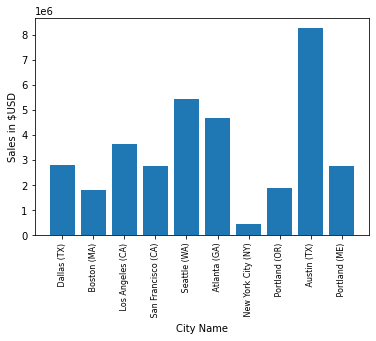

In [206]:
cities = all_data["City"].unique()

plt.bar(cities, results["Sales"])

plt.xticks(cities, rotation="vertical", size=8)

plt.xlabel("City Name")
plt.ylabel("Sales in $USD")

plt.show()

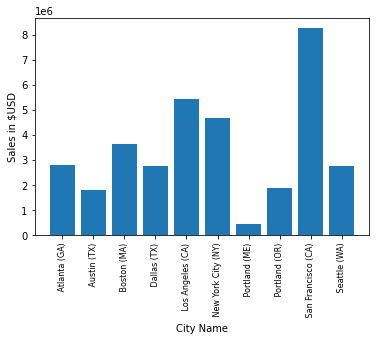

In [208]:
cities = [city for city , df in all_data.groupby("City")]

plt.bar(cities, results["Sales"])

plt.xticks(cities, rotation="vertical", size=8)

plt.xlabel("City Name")
plt.ylabel("Sales in $USD")

plt.show()

####  Question 3:
### What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [215]:
#type(all_data["Order Date"][0])

all_data["Hour"] = all_data["Order Date"].dt.hour

all_data["Minute"] = all_data["Order Date"].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles (CA),9,27


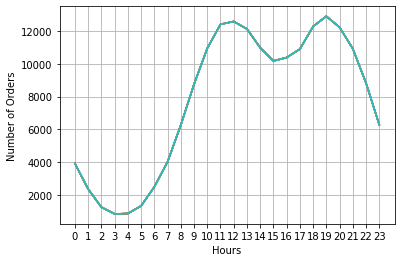

In [221]:
hours = [hour for hour , df in all_data.groupby("Hour")]

plt.plot(hours, all_data.groupby(["Hour"]).count())

plt.xticks(hours)

plt.xlabel("Hours")
plt.ylabel("Number of Orders")

plt.grid()

plt.show()

#### Question 4:
### What products are most often sold together?

##### MY WAY

In [232]:
all_data["Time"] = all_data["Order Date"].dt.time

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas (TX),8,46,08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston (MA),22,30,22:30:00
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles (CA),14,38,14:38:00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles (CA),14,38,14:38:00
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles (CA),9,27,09:27:00


In [246]:
products = [product for product , df  in all_data.groupby("Product")]
products

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

In [267]:
#print(all_data.groupby(['Product','Time'])['Product'].agg(['count']))
all_data.groupby(['Product','Time'])['Time'].agg(['count']).sort_values(by="count", ascending=False)

count
Product                  Time           
Lightning Charging Cable 10:57:00     43
AA Batteries (4-pack)    19:35:00     42
AAA Batteries (4-pack)   11:44:00     40
AA Batteries (4-pack)    12:06:00     40
USB-C Charging Cable     14:27:00     40
...                                  ...
Flatscreen TV            09:56:00      1
LG Washing Machine       19:47:00      1
                         19:51:00      1
Flatscreen TV            09:34:00      1
20in Monitor             00:00:00      1

[22752 rows x 1 columns]

##### My Ans :  AAA Batteries and AA Batteries

### Keith's Way

In [270]:
## drop my Time 
all_data = all_data.drop("Time", axis=1)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles (CA),9,27


In [280]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x:",".join(x))

df = df[["Order ID", "Grouped"]].drop_duplicates()

#df.head(10)


<ipython-input-280-64f76d1782e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x:",".join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [282]:
# additional libraries 
from itertools import combinations
from collections import Counter

In [293]:
count = Counter()

for row in df["Grouped"]:
    row_lst = row.split(",")
    count.update(Counter(combinations(row_lst, 2)))
    #print(row)
    
#count.most_common(5)  

for key, value in count.most_common(5):
    print(key, value)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361


#### Question 5:
### What product sold the most? Why do you think it sold the most?

In [294]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles (CA),9,27


In [302]:
product_grp = all_data.groupby("Product")
#product_grp.sum()

quantity_ordered = product_grp.sum()["Quantity Ordered"]
#quantity_ordered

products = [product for product, df in product_grp]
#products

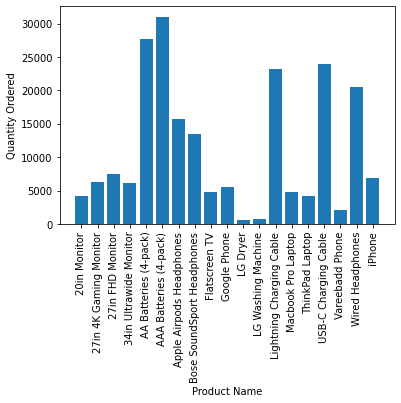

In [308]:
plt.bar(products, quantity_ordered)

plt.xticks(products, rotation="vertical", size=10)

plt.ylabel("Quantity Ordered")
plt.xlabel("Product Name")

plt.show()

In [309]:
# checking the hypothesis
prices = all_data.groupby("Product").mean()["Price Each"]

prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-318-10fa281cef71>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation="vertical", size=10)


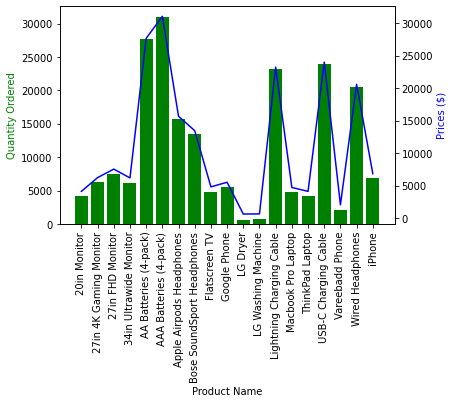

In [318]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered, color="g")
ax2.plot(products, quantity_ordered, "b-")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color="g")
ax2.set_ylabel("Prices ($)", color="b")

ax1.set_xticklabels(products, rotation="vertical", size=10)

plt.show()